<a href="https://colab.research.google.com/github/Vakhranev/Networks/blob/master/HW_1_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Network Science</center>

Home Assignment #1: Network description and network centralities

#### <hr /> General Information

**Due Date:** 08.05.2020 18:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_*{Number}***

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

## Problems

### Task 1. Data preparation

<img src ="https://dl.dropboxusercontent.com/s/nt1tbmathgo3gg8/g1.png?dl=1" style="width:600px;heigth:200px">

1.1. Load [VKontakte](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) dataset to NetworkX <br>
1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only `seed` and `friends#1` nodes, only `r0`, `r1`, `r2` edges) <br>
1.3. Find graph diameter, average and global clustering coefficient <br>
1.4. Find max and mean values of incoming and outcoming node degrees <br>
1.5. Vizualize your graph in gephi, networkX and grahistry <br>


In [0]:
# Start your code here
#
#
#
import networkx as nx

In [0]:
G = nx.read_adjlist(path = 'fb.adjlist')

In [10]:
G.nodes

NodeView(('FB_100008048641182', 'FB_100036636180455', 'FB_100025171904558', 'FB_100017124885272', 'FB_100016952268399', 'FB_100016181348721', 'FB_100015765906809', 'FB_100015217186181', 'FB_100014812541578', 'FB_100013630501509', 'FB_100013467900949', 'FB_100013448718678', 'FB_100013422377475', 'FB_100012857683072', 'FB_100012604635258', 'FB_100011289580459', 'FB_100010902728124', 'FB_100010572972808', 'FB_100009794137665', 'FB_100009627480722', 'FB_100009616692943', 'FB_100009411561228', 'FB_100009102506109', 'FB_100007840987899', 'FB_100007817682625', 'FB_100007719735361', 'FB_100007628082259', 'FB_100007355083419', 'FB_100007154765468', 'FB_100007022131477', 'FB_100006611941252', 'FB_100006479398952', 'FB_100006410592875', 'FB_100006296823451', 'FB_100005632294845', 'FB_100005114292234', 'FB_100004517769072', 'FB_100004466501143', 'FB_100004441784172', 'FB_100004340208372', 'FB_100004083287762', 'FB_100003911960476', 'FB_100003818690670', 'FB_100003714199074', 'FB_100002948244371', 

In [0]:
for v in G.neighbors('FB_100008048641182'):
    print(v)

In [0]:
nodes_3 = ['FB_100008048641182','FB_100036636180455','FB_100025171904558']
for n in nodes_3:
    for v in G.neighbors(n):
        if v not in nodes_3:
            nodes_3.append(v)
sub_g = nx.subgraph(G, nodes_3)

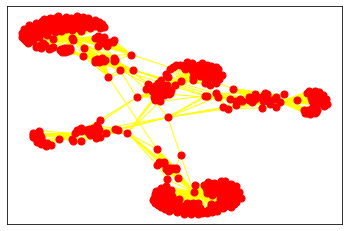

In [25]:
pos = nx.spring_layout(sub_g)

nx.draw_networkx_nodes(sub_g, pos, node_color='red', node_size=50)
nx.draw_networkx_edges(sub_g, pos, edge_color='yellow')

In [5]:
nx.diameter(sub_g)

6

In [6]:
nx.average_clustering(sub_g)

0.6715972726651585

In [7]:
nx.transitivity(sub_g)

0.3700984780662489

In [27]:
maxd = []
meand = 0
Count = 0
for v in sub_g:
    deg = sub_g.degree(v)
    maxd.append(deg)
    meand += deg
    Count += 1
print(max(maxd))
print(meand/Count)

143
9.477732793522268


In [0]:
nx.write_gexf(sub_g, 'graph_file.gexf')

In [6]:
!pip install graphistry

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for graphistry: filename=graphistry-0.10.4-py2.py3-none-any.whl size=31746 sha256=4010af4ba7d957a9ea7cdf8d6e13fbdf235ca306d49749537b0f308f8a2fa774
  Stored in directory: /root/.cache/pip/wheels/41/a1/13/32fdf194dc6aa8cec47a68ce182c66f91eaa90aea557431d06
Successfully built graphistry


In [0]:
import graphistry

graphistry.register(key='3bd0ff5a5304a3ee27de2ca78ac7b67bbc48dc67409c255c0f70250955cf967c')

In [18]:
import pandas as pd

df = pd.read_csv('fb.tsv', sep='\t')

df.head(10)

,Unnamed: 0,Friends,ID,Name
0,0,FB_100036636180455,FB_100008048641182,Анастасия Пушнова
1,1,FB_100025171904558,FB_100008048641182,Анастасия Пушнова
2,5,FB_100017124885272,FB_100008048641182,Анастасия Пушнова
3,6,FB_100016952268399,FB_100008048641182,Анастасия Пушнова
4,7,FB_100016181348721,FB_100008048641182,Анастасия Пушнова
5,8,FB_100015765906809,FB_100008048641182,Анастасия Пушнова
6,9,FB_100015217186181,FB_100008048641182,Анастасия Пушнова
7,10,FB_100014812541578,FB_100008048641182,Анастасия Пушнова
8,12,FB_100013630501509,FB_100008048641182,Анастасия Пушнова
9,13,FB_100013467900949,FB_100008048641182,Анастасия Пушнова


In [0]:
newdf = df.loc[df['ID'].isin(nodes_3)]
newdf2 = newdf.loc[newdf['Friends'].isin(nodes_3)]

In [23]:
g = graphistry.edges(newdf2).bind(source='ID', destination='Friends')
g.plot()

### Task 2. Power Law
2.1. Check that Zipf's Law holds <br>

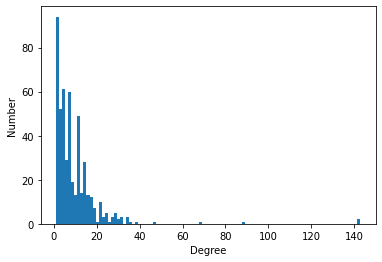

In [29]:
# Start your code here
#
#
#
import matplotlib.pyplot as plt
degrees = np.array(list(dict(sub_g.degree()).values()))
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(degrees, 100)
plt.show()

Заметно существенное количество выбросов, но, в целом, закон Ципфа соблюдается.

### Task 3. Structural analysis

3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree <br>
3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree <br>
3.3. Print 5 nodes with maximum eigenvector centrality, vizualize your graph with color or size as the function of degree <br>
3.4 Print histogram with centralities distribution of your graph <br>

In [64]:
# Start your code here
#
#
#
degree_centr = nx.degree_centrality(sub_g)
vals = degree_centr.values()
type(vals)
s_vals = sorted(vals, reverse=True)
max_sv = s_vals[0:5]
for k, v in degree_centr.items():
        if v in max_sv:
            print(k)

FB_100008048641182
FB_100001982435359
FB_100015924338648
FB_100007888727207
FB_100001770746822


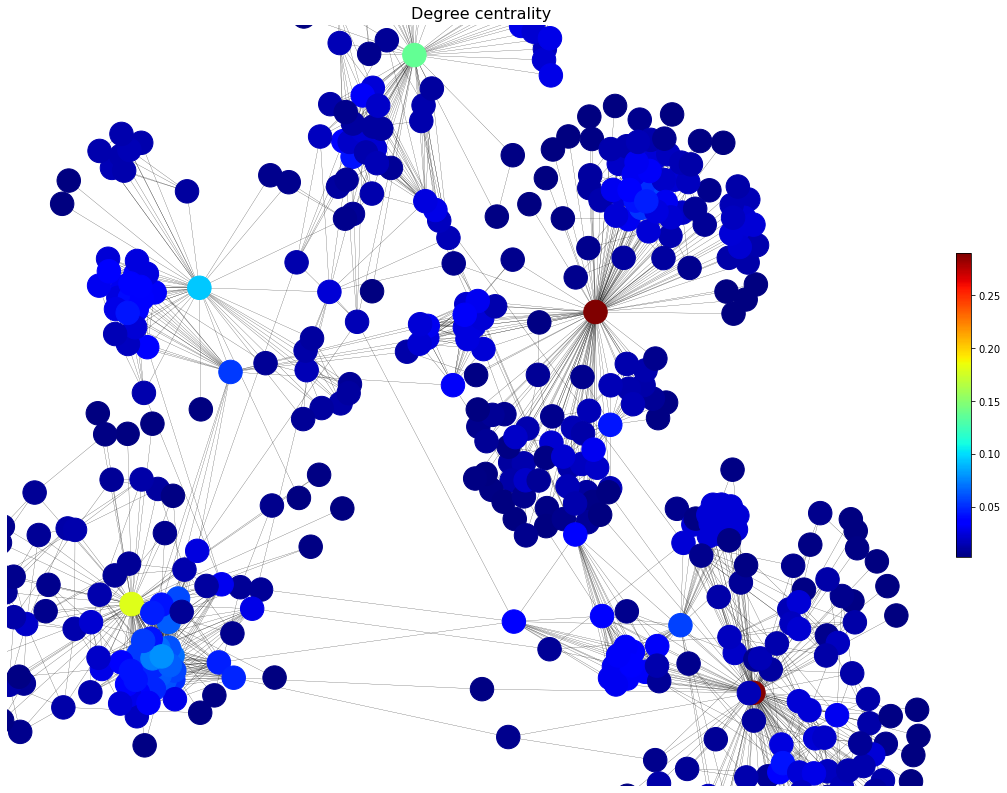

In [77]:
plt.figure(figsize=(20,14))
node_colors = list(degree_centr.values())
coord = nx.spring_layout(sub_g, k = 0.15)

nodes = nx.draw_networkx_nodes(sub_g, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(sub_g, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Degree centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[-3:]

In [78]:
between_centr = nx.betweenness_centrality(sub_g)
bvals = between_centr.values()
b_vals = sorted(bvals, reverse=True)
max_bv = b_vals[0:5]
for k, v in between_centr.items():
        if v in max_bv:
            print(k)

FB_100001982435359
FB_100010479556462
FB_100001625827378
FB_100042012722952
FB_100001770746822


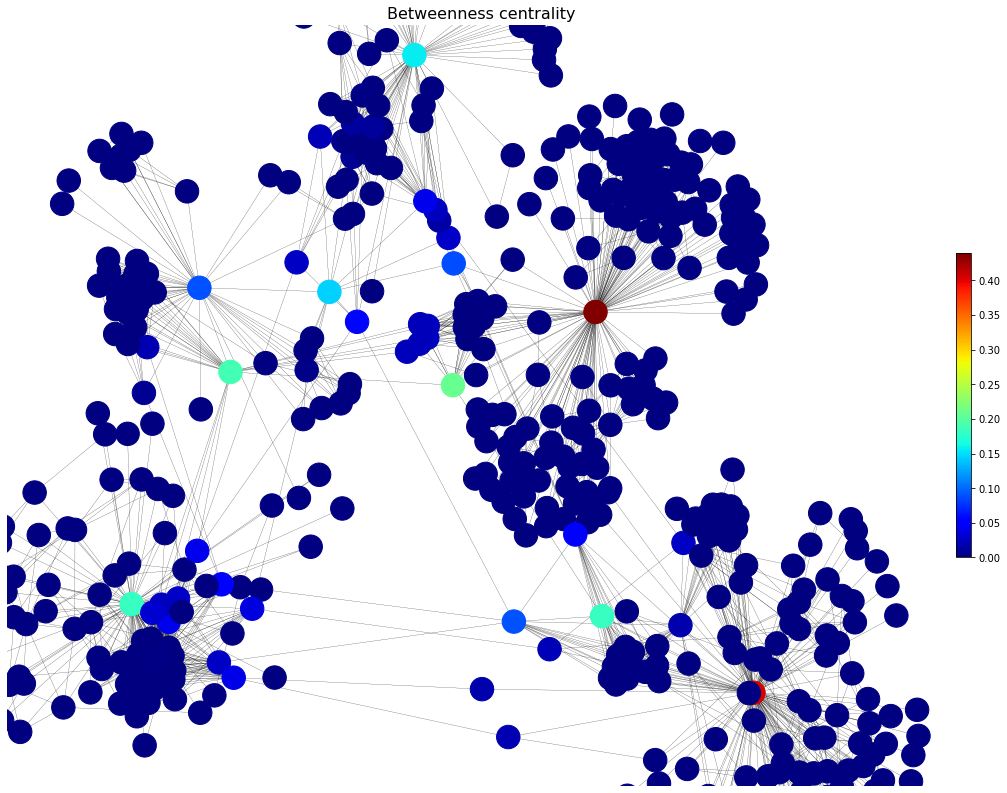

In [79]:
plt.figure(figsize=(20,14))
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(sub_g, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(sub_g, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[-5:]

In [80]:
eig_centr = nx.eigenvector_centrality(sub_g)
evals = eig_centr.values()
e_vals = sorted(evals, reverse=True)
max_ev = e_vals[0:5]
for k, v in eig_centr.items():
        if v in max_ev:
            print(k)

FB_100007888727207
FB_100009093778173
FB_100004252568265
FB_100001962377380
FB_100001933644071


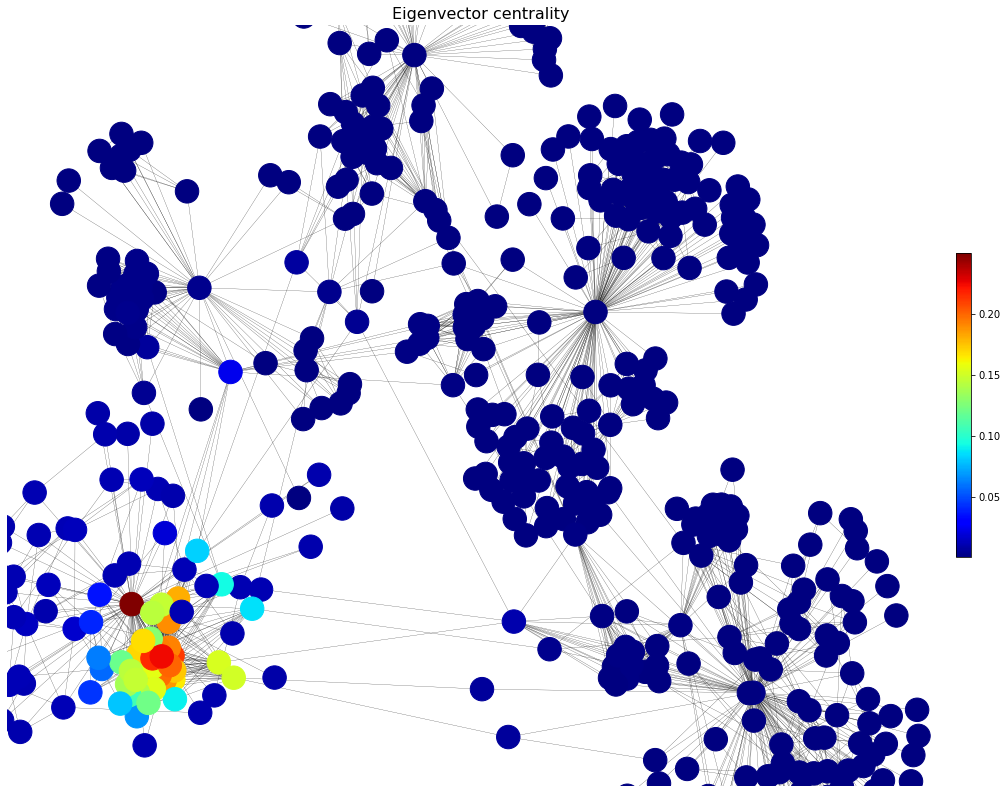

In [81]:
plt.figure(figsize=(20,14))
node_colors = list(eig_centr.values())

nodes = nx.draw_networkx_nodes(sub_g, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(eig_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(sub_g, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Eigenvector centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(eig_centr, key = eig_centr.get)[-5:]

In [0]:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

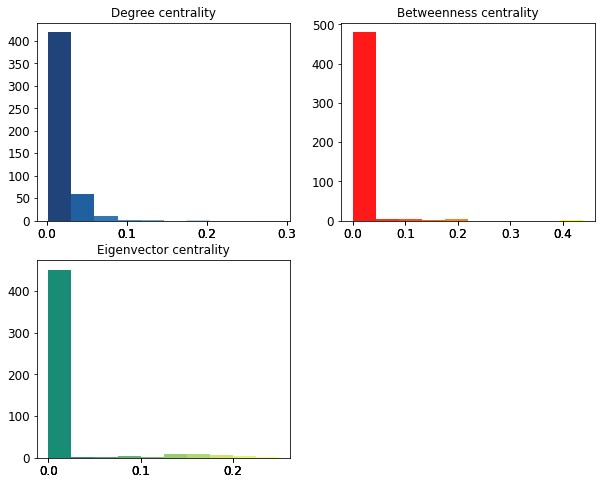

In [87]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 2, 2)
plt.title("Betweenness centrality", y = 1.00)
plot_hist(data = list(between_centr.values()), colormap = 'autumn', alpha = 0.9, bins = 10)

plt.subplot(2, 2, 3)
plt.title("Eigenvector centrality", y = 1.00)
plot_hist(data = list(eig_centr.values()), colormap = 'summer', alpha = 0.9, bins = 10, round_value=1)